# Perceptron - démo de cours magistral

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
## fonctions présentes dans le fichier mes_fonctions.py
import sys
# sys.path.insert(0, '/home/flandes/Dropbox/Enseignement/mesModulesPython')
# import mes_fonctions

### Remarque: 
Vous pouvez aussi copier-coller le contenu du squelette fourni (les fonctions du fichier TP4-mes_fonctions.py) dans des cellules de ce jupyter-notebook, et travailler directement ici. En fait, c'est beaucoup plus pratique pour faire tourner votre code (sinon vous pouvez aussi directement utiliser `ipython`)

In [5]:
## texte que l'on peut mettre dans un fichier "mes_fonctions.py"
def make_blobs(N):
    # data set 3
    N1=N//4
    N2=N-N1
    D=2
    np.random.seed(42)

    # parameters for the 1st blob of points
    mu1=(0.3,0.3)
    sigma1=((1, 0.3))
    X1 = np.random.normal( mu1, sigma1,(N1,D))

    # parameters for the 2nd blob of points
    mu2=(-2,-2)
    sigma2=((2, 0.5))
    X2 = np.random.normal( mu2, sigma2,(N2,D))

    # the two blobs are merged, and labels  +1/-1  are assigned
    Xraw = np.concatenate( (X1, X2) )
    Y = np.concatenate( (np.ones(N1), -np.ones(N2)) ) # .reshape(N,1)
    X = Xraw.copy() # then X will be the extended vector, with the ones added

    X =  np.hstack((np.ones((N,1)), X))  # extended vector

    return X,Y

## Il peut etre utile de definir la norme d'un vecteur:
def norme(w):
    return ((w**2).sum())**0.5

def display(X, Y, wInit, iteration):
    w=wInit.copy()
    w0= w[0] # c'est la partie qui caractérise la distance à l'origine, qui détermine l'ordonnée à l'origine (mais ce n'est pas égal à ça)
    ## on normalise les composantes du vrai vecteur w
    wprime = w[1:] # /(w[1]**2+w[2]**2)**0.5
    print(w, w0, wprime)

    u_w = (wprime/norme(wprime)) # vecteur unitaire donnant la direction
    distance_origine_droite = -w0/norme(wprime)
    projete_de_Origine_sur_droite = u_w * distance_origine_droite
    print("projete_de_Origine_sur_droite", projete_de_Origine_sur_droite)

    vecteur_Orthogonal_A_La_Droite = np.array([wprime[1],-wprime[0]])
    extremite1 = projete_de_Origine_sur_droite + vecteur_Orthogonal_A_La_Droite*10
    extremite2 = projete_de_Origine_sur_droite - vecteur_Orthogonal_A_La_Droite*10
    extremites_abscisses = np.array([extremite1[0], extremite2[0]])
    extremites_ordonnees = np.array([extremite1[1], extremite2[1]])

    plt.figure(1)
    Class1 = X[Y==-1,1:] # points of class "-1"
    Class2 = X[Y== 1,1:] # points of class "+1"
    plt.plot(Class1[:,0], Class1[:,1], 'r+') # points of class "-1"
    plt.plot(Class2[:,0], Class2[:,1], 'bx') # points of class "+1"
    cmap = cm.jet
    colorGradient=cmap(np.linspace(0.0,1.0,12))
    plt.plot(extremites_abscisses, extremites_ordonnees,  color=colorGradient[iteration%(len(colorGradient))])
    print(extremites_abscisses)

    ## on peut vérifier que ces choses donnent 0:
    #     vecteur_Orthogonal_A_La_Droite = np.array([wprime[1],-wprime[0]])
    #     wprime @ vecteur_Orthogonal_A_La_Droite


    # ## autre méthode
    # w = wInit.copy()
    # if w[2] != 0.0:
    #     a = - w[1]/w[2]
    #     b = -w[0]/w[2]
    # else:
    #     pass
    #     # TODO
    # x = np.linspace(-0.5,1)
    # y = x * a + b

    # plt.figure(1)
    # Class1 = X[Y==-1,1:] # points of class "-1"
    # Class2 = X[Y== 1,1:] # points of class "+1"
    # plt.plot(Class1[:,0], Class1[:,1], 'r+') # points of class "-1"
    # plt.plot(Class2[:,0], Class2[:,1], 'bx') # points of class "+1"
    # cmap = cm.jet
    # colorGradient=cmap(np.linspace(0.0,1.0,12))
    # plt.plot(x,y, color='red')

    # plt.scatter([projete_de_Origine_sur_droite[0],projete_de_Origine_sur_droite[0]],[projete_de_Origine_sur_droite[1], projete_de_Origine_sur_droite[1]], color='k')


def initializeWeights(X, type):
    ## data dimension
    D = X.shape[1]

    ## choice 1: deterministic
    if type=="zero":
        wparameters = np.zeros((D))
        wparameters[0] = 0.00001

    ## choice 2: uniform random centered in 0
    ##           with appropriate order of magnitude
    elif type=="random":
        wparameters = (np.random.random((D))-0.5)/D**0.5

    return wparameters



In [6]:
N=100
X, Y = make_blobs(100)

[1.   0.01 1.  ] 1.0 [0.01 1.  ]
projete_de_Origine_sur_droite [-0.009999   -0.99990001]
[  9.990001 -10.009999]


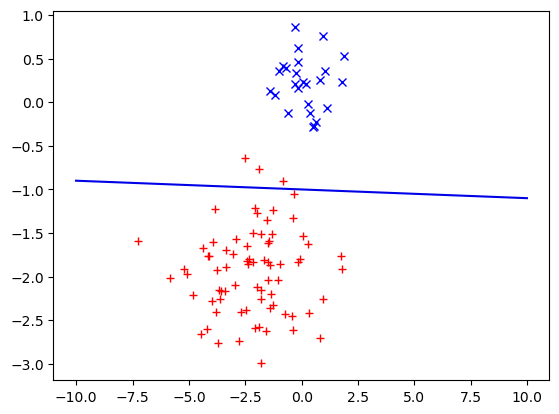

In [7]:
w0 = np.array([1,0.01,1])
display(X,Y, w0, 1)


## 1. Initialization

- make a stupid or random guess for an initial value of the parameters vector `wparameters`, i.e set a value for $\vec w_0=$ `w0`, the initial value of $\vec w$
- choose some values for the hyper-parameters `eta`, `MaxIter`


### Initialization of weights

It's independent of the rest, we just need to know the dimensionality of parameters to be initalized

[-0.22224835  0.0629696  -0.21166183]
[-0.22224835  0.0629696  -0.21166183] -0.22224834971817833 [ 0.0629696  -0.21166183]
projete_de_Origine_sur_droite [ 0.28698105 -0.96463908]
[-1.8296372   2.40359931]


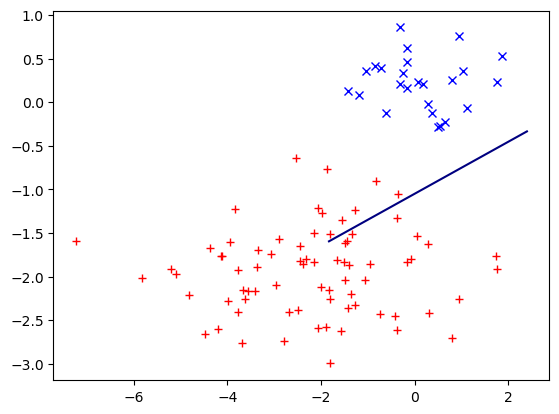

In [9]:
######### initialization of the separating vector ######
np.random.seed(43)
w0 = initializeWeights(X,"random")
print(w0)
display(X,Y, w0, 0)

In [17]:
plotting = True
verbose = True

In [81]:
X.shape, Y.shape

((100, 3), (100,))

In [11]:
n = 43
X[n]@ w0 * Y[n]

-0.155629082395902

In [14]:
X[n]*Y[n]

array([-1.        ,  0.16919576,  1.83562445])

In [77]:
## minimalistic correction:
def perceptronFullBatch_version_minimale(X,Y,eta, w0, maxIter=20, plot=None, verbose=None, Loss=None):
    N = X.shape[0]
    D = X.shape[1]
    wnew = w0.copy()
    for epoque in range(maxIter):
        w = wnew.copy()
#         ListeDesIndicesDesPointsMalClasses = []
        for n in range(N):
            if X[n]@ w * Y[n] <= 0 :
                wnew += eta *  1./N * X[n]*Y[n]
                
#                 ListeDesIndicesDesPointsMalClasses.append(n)
#         wnew = w.copy()
#         for n in ListeDesIndicesDesPointsMalClasses:
#             wnew += eta *  1./N * X[n]*Y[n]
    return wnew

In [78]:
### hyper-parameters ###
MAXITER=2000
eta = 0.01
## on lance le calcul
w =  perceptronFullBatch_version_minimale(X,Y,eta, w0, MAXITER, plotting, verbose)

In [79]:
w0, w

(array([-0.22224835,  0.0629696 , -0.21166183]),
 array([0.01365165, 0.01224211, 0.02936344]))

[0.01365165 0.01224211 0.02936344] 0.013651650281813482 [0.01224211 0.02936344]
projete_de_Origine_sur_droite [-0.16513012 -0.39607445]
[ 0.12850429 -0.45876452]


(-5.0, 5.0)

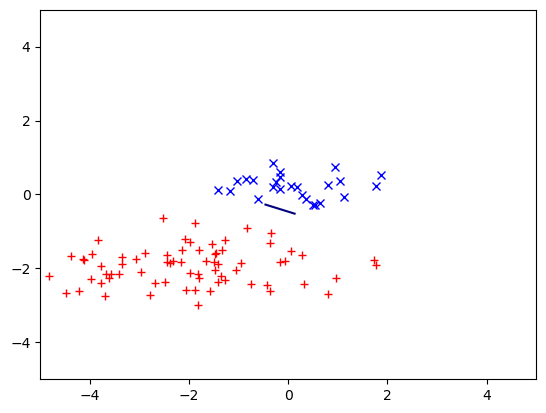

In [80]:
display(X,Y, w, 0)
plt.xlim([-5,5])
plt.ylim([-5,5])

In [93]:
wparameters = w0 

In [94]:
((X @ wparameters)*Y) <= 0 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True])

In [95]:
misClassified = ((X @ wparameters)*Y  <= 0)

In [97]:
Y[misClassified].shape, X[misClassified].shape

((74,), (74, 3))

In [98]:
(Y[misClassified]@X[misClassified])

array([-24.        ,  83.17731416, 110.75830211])

In [64]:
## minimalistic correction:
def perceptronFullBatch_version_minimale(X,Y,eta, w0, maxIter=20, plot=None, verbose=None, Loss=None):
    N = X.shape[0]
    D = X.shape[1]
    wparameters = w0.copy()  # deep copy
    for iteration in range(maxIter):
        misClassified = ((X @ wparameters)*Y  <= 0) ## array of booleans (used as a mask or filter)
        wparameters -= -eta/N * (Y[misClassified]@X[misClassified])
    return wparameters


In [65]:
### hyper-parameters ###
MAXITER=85
eta = 0.05
## on lance le calcul
w =  perceptronFullBatch_version_minimale(X,Y,eta, w0, MAXITER, plotting, verbose)

[0.01725165 0.01453354 0.03665778] 0.017251650281821723 [0.01453354 0.03665778]
projete_de_Origine_sur_droite [-0.16123785 -0.40668835]
[ 0.20533997 -0.52781568]


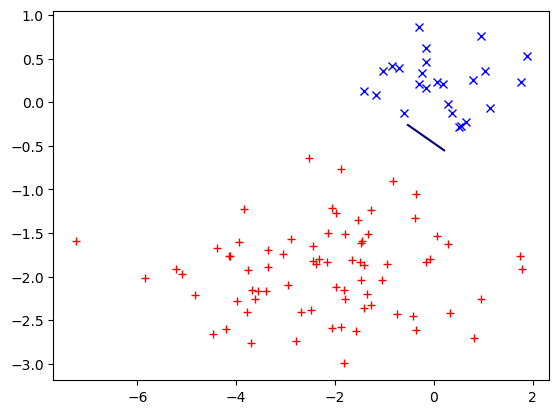

In [66]:
display(X,Y, w, 0)

In [100]:
import sklearn.model_selection

## full correction, with monitoring, displays, additional exit criterion, etc
def perceptronFullBatch_version_decoree(Xinput, Yinput,eta, w0, maxIter=20, plot=True, verbose=True, Loss="ReLU"):
    
    X, X_valid, Y, Y_valid = sklearn.model_selection.train_test_split(Xinput, Yinput, test_size=0.3, random_state=42)
    N = X.shape[0]
    D = X.shape[1]
    wparameters = w0.copy()  # deep copy
    suiviNbErreurs_ensemble_entrainement    = np.zeros(maxIter)
    suiviNbErreurs_ensemble_validation      = np.zeros(maxIter)
    suiviFonctionCout_ensemble_entrainement = np.zeros(maxIter)
    suiviFonctionCout_ensemble_validation   = np.zeros(maxIter)
    
    err_train, err_val, loss_train, loss_val = suiviNbErreurs_ensemble_entrainement   ,     suiviNbErreurs_ensemble_validation     ,     suiviFonctionCout_ensemble_entrainement,     suiviFonctionCout_ensemble_validation  
    
    ## the algo itself ##
    for iteration in range(maxIter):
        ## we look for misclassified examples ##
        modelValues = X @ wparameters
        XwT = (modelValues)*Y          #  This is   (X @ w * Y)
        misClassified = (XwT <= 0) ## array of booleans (used as a mask or filter)
        misClassifiedNumber = misClassified.sum()  ## True~1, False~0,so by summing up, we count the True's
        if misClassifiedNumber == 0:
            print("Convergence at iteration", iteration)
            if plot :
                display(X,Y, wparameters, iteration)
            print(wparameters)
            return wparameters, err_train, err_val, loss_train, loss_val
        else: ## updating parameters ##

            if Loss=="ReLU":
               #  Rosenblatt style, but full batch:
               wparameters -= -eta/N * (Y[misClassified]@X[misClassified])
            elif Loss=="stupidJ2":
                # following the ~stupid choice J2 of the slides instead
                wparameters -= eta/N * (modelValues - Y) @ X
            else:
                print("You need to choose a Loss function!")
                return wparameters, err_train, err_val, loss_train, loss_val

            if verbose:
                print("iteration #",iteration," there are " , misClassifiedNumber, 'misclassified points => new vector', wparameters)
        if plot :
            display(X,Y, wparameters, iteration)
            
        ## logging of error numbers and cost function value over epochs (GD iterations)
        misClassified_train=  ((X       @ wparameters)*Y        <= 0)
        misClassified_valid = ((X_valid @ wparameters)*Y_valid  <= 0)
        suiviNbErreurs_ensemble_entrainement    [iteration] = misClassified_train.mean() ## == misClassifiedNumber
        suiviNbErreurs_ensemble_validation      [iteration] = misClassified_valid.mean()
        suiviFonctionCout_ensemble_entrainement [iteration] = np.mean( -X      [misClassified_train]@ wparameters * Y      [misClassified_train])
        suiviFonctionCout_ensemble_validation   [iteration] = np.mean( -X_valid[misClassified_valid]@ wparameters * Y_valid[misClassified_valid])


    print("No convergence after", maxIter, "iterations.\nThere were misClassifiedNumber*100/N=",misClassifiedNumber/N*100, "% misclassified data points.")
    err_train, err_val, loss_train, loss_val = suiviNbErreurs_ensemble_entrainement   ,     suiviNbErreurs_ensemble_validation     ,     suiviFonctionCout_ensemble_entrainement,     suiviFonctionCout_ensemble_validation  
    return wparameters, err_train, err_val, loss_train, loss_val




In [101]:
((- X@ w) *Y).sum()

-5.778973120933611

iteration # 0  there are  54 misclassified points => new vector [-0.25081978  0.14764861 -0.09597581]
[-0.25081978  0.14764861 -0.09597581] -0.2508197782896069 [ 0.14764861 -0.09597581]
projete_de_Origine_sur_droite [ 1.19417729 -0.77624937]
[0.23441915 2.15393543]
iteration # 1  there are  21 misclassified points => new vector [-0.23224835  0.14568572 -0.07771176]
[-0.23224835  0.14568572 -0.07771176] -0.23224834971817832 [ 0.14568572 -0.07771176]
projete_de_Origine_sur_droite [ 1.24104883 -0.66200092]
[0.46393128 2.01816638]
iteration # 2  there are  20 misclassified points => new vector [-0.21510549  0.14103825 -0.06020517]
[-0.21510549  0.14103825 -0.06020517] -0.21510549257532116 [ 0.14103825 -0.06020517]
projete_de_Origine_sur_droite [ 1.29008  -0.550698]
[0.68802832 1.89213168]
iteration # 3  there are  19 misclassified points => new vector [-0.19653406  0.13684391 -0.04614193]
[-0.19653406  0.13684391 -0.04614193] -0.1965340640038926 [ 0.13684391 -0.04614193]
projete_de_Origine

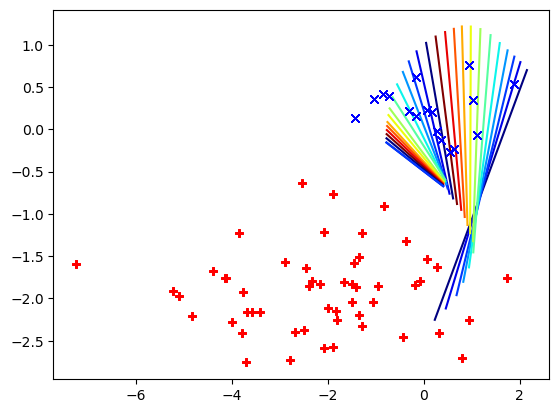

In [115]:
### hyper-parameters ###
MAXITER=85
eta = 0.1
## on lance le calcul
w, err_train, err_val, loss_train, loss_val =  perceptronFullBatch_version_decoree(X,Y,eta, w0, MAXITER, plotting, verbose)

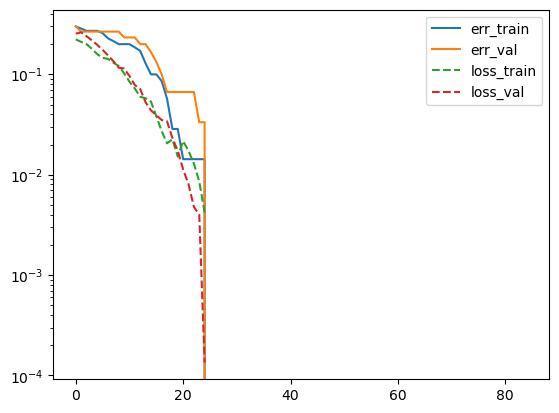

In [116]:
plt.plot(err_train, label = 'err_train')
plt.plot(err_val, label = 'err_val')
plt.plot(loss_train,ls="--", label = 'loss_train')
plt.plot(loss_val, ls="--",label = 'loss_val')
plt.semilogy()
plt.legend()

# On teste sur des "vraies" données (en fait, c'est encore un très petit jeu de données)

## Load_digits (minim-MNIST, en taille 8x8, avec seulement ~2000 exemples)

Remarque: Le MNIST complet en contient 70000, chacun de taille 28x28. Allez voir https://gitlab.inria.fr/flandes/data-for-teaching/-/blob/master/import-mnist70-numpy-npz.py si vous voulez charger mon fichier https://gitlab.inria.fr/flandes/data-for-teaching/-/blob/master/mnist70.npz

In [118]:
import sklearn.datasets
X, Y = sklearn.datasets.load_digits(n_class=2, return_X_y=True)

## on fait immédiatement l'astuce du 1 (augmentation de toutes les données par ajout d'une colonne de 1)
N = X.shape[0]
X =  np.hstack((np.ones((N,1)), X))  # extended vector
## on encode le label "Ground Truth" (vrai) dans les valeurs {-1,1} plutot que {0,1}
Y*=2
Y-=1
## on coupe et on réserve 20% des data pour le test final 
X, X_test, Y, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

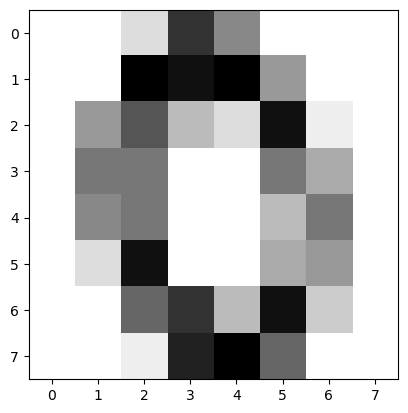

In [119]:
## la premiere image est un zero:
plt.imshow(X[0,1:].reshape(8, 8), cmap=plt.cm.binary)

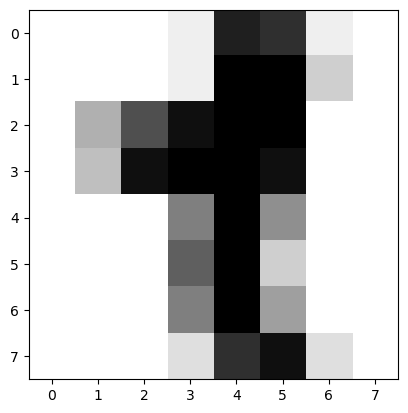

In [120]:
## la 45ème image est un 1:
plt.imshow(X[44,1:].reshape(8, 8), cmap=plt.cm.binary)

No convergence after 200 iterations.
There were misClassifiedNumber*100/N= 1.4925373134328357 % misclassified data points.


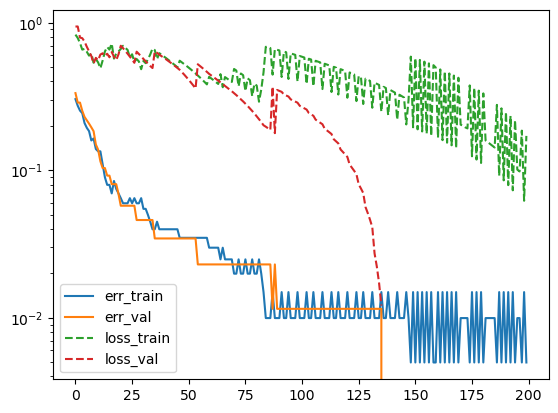

In [136]:
### hyper-parameters ###
MAXITER=200
eta = 0.001
## on lance le calcul
plotting=False
verbose=False

## on initialise w avec la bonne dimension (ceci pourrait/devrait etre fait dans la fonction de fit, en fait)
np.random.seed(12)
w0 = initializeWeights(X, "random")

w, err_train, err_val, loss_train, loss_val =  perceptronFullBatch_version_decoree(X,Y,eta, w0, MAXITER, plotting, verbose)

plt.plot(err_train, label = 'err_train')
plt.plot(err_val, label = 'err_val')
plt.plot(loss_train,ls="--", label = 'loss_train')
plt.plot(loss_val,ls="--", label = 'loss_val')
plt.semilogy()
plt.legend()

In [137]:
w.shape

(65,)

### À tester: essayer de varier la graine, c.a.d. 
`np.random.seed(12)` : rempalcer par `np.random.seed(1) `  (essayer plein de valeurs)

Et à chaque fois, observer le comportement des courbes. Intéressant, non?

# Encore un test: sur le dataset des vins

In [ ]:
import sklearn.datasets
X, Y = sklearn.datasets.load_wine(return_X_y=True)

## on filtre les vins qui ne sont pas d'une des deux premières classes
filtre = Y<2
X = X[filtre]
Y = Y[filtre]
## on fait immédiatement l'astuce du 1 (augmentation de toutes les données par ajout d'une colonne de 1)
N = X.shape[0]
X =  np.hstack((np.ones((N,1)), X))  # extended vector
## on encode le label "Ground Truth" (vrai) dans les valeurs {-1,1} plutot que {0,1}
Y*=2
Y-=1
## on coupe et on réserve 20% des data pour le test final 
X, X_test, Y, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X.shape, Y.shape, X_test.shape

In [ ]:
### hyper-parameters ###
MAXITER=200
eta = 0.001
## on lance le calcul
plotting=False
verbose=False

## on initialise w avec la bonne dimension (ceci pourrait/devrait etre fait dans la fonction de fit, en fait)
np.random.seed(1)
w0 = initializeWeights(X, "random")

w, err_train, err_val, loss_train, loss_val =  perceptronFullBatch_version_decoree(X,Y,eta, w0, MAXITER, plotting, verbose)

plt.plot(err_train, label = 'err_train')
plt.plot(err_val, label = 'err_val')
plt.plot(loss_train, label = 'loss_train')
plt.plot(loss_val, label = 'loss_val')
plt.semilogy()
plt.legend()

# TODO (à la maison - lors de votre projet): améliorer le choix des hyper-paramètres, et seulement à la fin de ce choix, tester sur le test set/
